 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [278]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [279]:
## create csv path to csv file. Experimenting with user defined file path shorthand names varibles.
## its best to find a shorthand that works for you and call backs to the original file so you dont 
##  forget what you are doing, flor.


# File Paths 
wr_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(wr_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)

sp500_hstry = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_hstry, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Print Headers
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [280]:
## Read the Whale Portfolio daily returns & "Clean" the Data
whale_df = pd.read_csv(wr_path, index_col ="Date", parse_dates = True, infer_datetime_format=True)
whale_df

## 1. Rename the Columns 
# Create a list array. Square Brackets [] encase the list. Each Label is surrounded 
# by double quotes. These will be the new labels for the columns in the series array for the dataframe.  

columns = [ "SFM LLC", "P&C, INC", "TGM, LLC", "BH INC"]
whale_df.columns = columns
whale_df.head()

# problem: wr_path did not work. It returned an error. However, I previously defined the path using 
# whale_df. It must still be a variable in the file. So I have switched to this user defined variable
# for the remainder of the project. 


,SFM LLC,"P&C, INC","TGM, LLC",BH INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [281]:
# Generate summary statistics - use in project1, flower!!!! 
# These are your quartiles and will help you accept or reject your hypothesis
whale_df.describe()

,SFM LLC,"P&C, INC","TGM, LLC",BH INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [282]:
# Group data by dtypes. Dtypes indentify data by float, integers, objects. etc. 
whale_df.dtypes


SFM LLC     float64
P&C, INC    float64
TGM, LLC    float64
BH INC      float64
dtype: object

In [283]:
# Count the data 
whale_df.count()

SFM LLC     1059
P&C, INC    1059
TGM, LLC    1059
BH INC      1059
dtype: int64

In [284]:
# Count nulls
whale_df.isnull().sum()

SFM LLC     1
P&C, INC    1
TGM, LLC    1
BH INC      1
dtype: int64

In [285]:
# Drop the Null Values from the dataframe
whale_df = whale_df.dropna()
whale_df

,SFM LLC,"P&C, INC","TGM, LLC",BH INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [286]:
# droping Nan values cleans the data because Nan values are numeric therefore Pandas cannot quantify 
# non-numerical values. Removing them from the data frame creates a streamlined index and prepares the
# data for statistical analysis through other statistical analyis libraries like matplot. 

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [287]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col ="Date", parse_dates = True, infer_datetime_format=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [288]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [289]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [290]:
# Rename the Columns in this df too. Change the file path name. 
columns = [ "DAILY1", "DAILY2"]
algo_df.columns = columns
algo_df.head()

,DAILY1,DAILY2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [291]:
# Reading S&P 500 Closing Prices
# 1. rename the file with user defined variable ( black text)
# 2. Indicate the File Path 

sp500_hstry = Path("Resources/sp500_history.csv")
# 3. Rename the dataframe to sp500_df.
# 4. Create an equality to indicate the file pandas is to read. 
# 5. Change the "DATE" parameter in the series index to real date and time by using the string Parse_dates = TRUE 
sp500_df = pd.read_csv(sp500_hstry, index_col ="Date", parse_dates = True, infer_datetime_format=True)
# return new dataframe
sp500_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [292]:
# Check Data Types. Data is an object because it contains the $ dollar sign. Remove it to change the 
# data into an integer.
sp500_df.dtypes

Close    object
dtype: object

In [293]:
# Remove $ by adding \$ inbetween ''. rename astype float.
sp500_df = sp500_df.replace('\$', '', regex=True).astype(float)



In [294]:
# Review the new data. Now you have a float.
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [295]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change()


# i think i need to save a new df file name for this but I am unsure. FEEDBACK REQUESTED

In [296]:
# percent change in decimal form for float value
all_returns = sp500_df.pct_change()
all_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [297]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()

Close    0
dtype: int64

In [298]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.columns = ["S&P 500 Daily Returns"]
sp500_df.head()

,S&P 500 Daily Returns
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [299]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_df.head()


,SFM LLC,"P&C, INC","TGM, LLC",BH INC,DAILY1,DAILY2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


<AxesSubplot:xlabel='Date'>

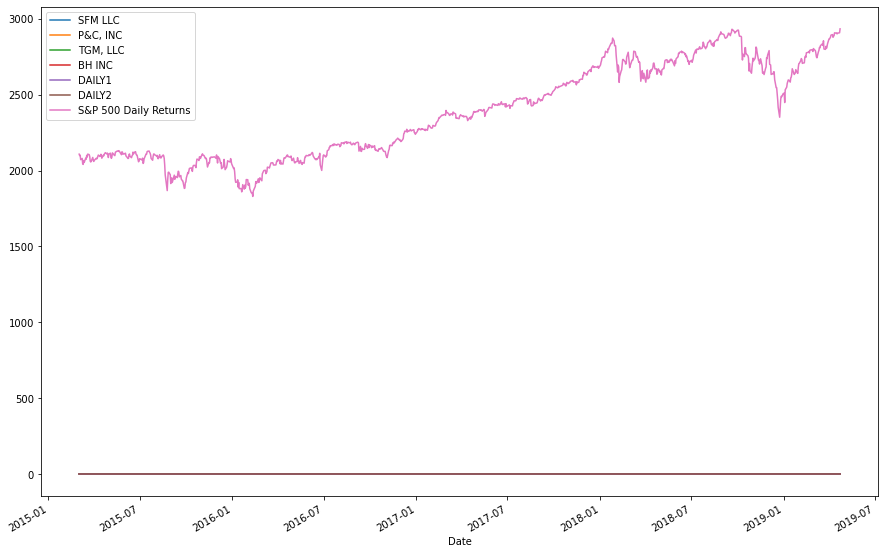

In [300]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10))

# clearly i am missing information here...not sure why it didnt transfer?

Text(0, 0.5, 'YTD')

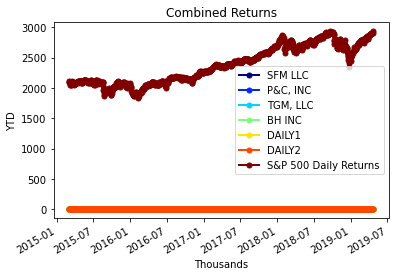

In [301]:
# add labels and remove <axisSubplot> information.
ax = combined_df.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Combined Returns')
ax.set_xlabel("Thousands")
ax.set_ylabel("YTD")

<AxesSubplot:xlabel='Date'>

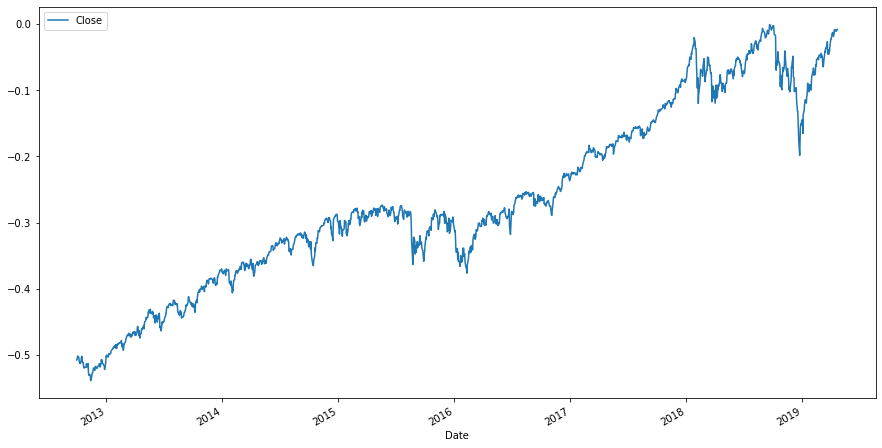

In [302]:
# Calculate cumulative returns of all portfolios. Somethings not right here. request feedback.
cumulative_returns = (1+all_returns).cumprod() -1
cumulative_returns.plot(figsize=(15,8))

# problem - did not pull all of the data. what went wrong??


# Conduct Quantitative Analysis

# In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [303]:
# Plot daily returns of all portfolios
combined_df.pct_change()

,SFM LLC,"P&C, INC","TGM, LLC",BH INC,DAILY1,DAILY2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944
...,...,...,...,...,...,...,...
2019-04-16,-2.898341,-1.335693,-3.088322,-1.079744,0.603391,-1.634218,0.000509
2019-04-17,-2.073108,-17.661104,4.306537,2.851033,0.483294,-2.803170,-0.002274
2019-04-18,-1.499843,-1.188925,-1.131886,-0.405345,-0.942926,-0.764890,0.001579


<AxesSubplot:xlabel='Date'>

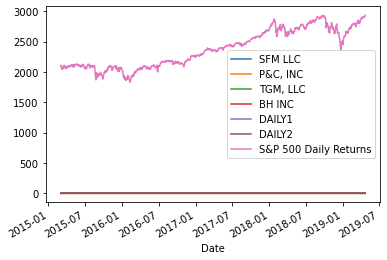

In [304]:
comb_df = combined_df.dropna()
comb_df.plot()

# wrong graph...idk why???

#### Calculate and Plot cumulative returns.

In [305]:

comb_df.head()

,SFM LLC,"P&C, INC","TGM, LLC",BH INC,DAILY1,DAILY2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


<AxesSubplot:xlabel='Date'>

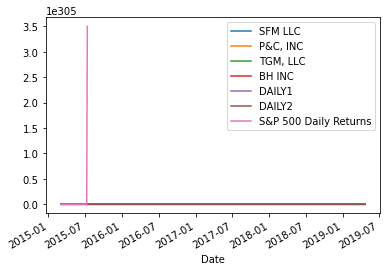

In [306]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()


# Plot cumulative returns
cumulative_returns.plot()

SFM LLC                    -0.992833
P&C, INC                   -0.996515
TGM, LLC                   -0.993528
BH INC                     -0.986722
DAILY1                     -0.995031
DAILY2                     -0.990378
S&P 500 Daily Returns    2932.680000
dtype: float64


<AxesSubplot:>

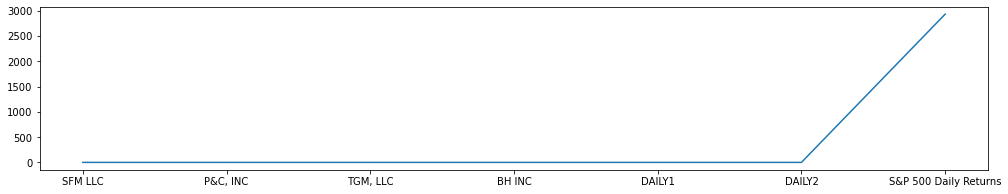

In [307]:

# Calculate cumulative returns of all portfolios
cum_returns = (comb_df.iloc[-1]- comb_df.iloc[0]/comb_df.iloc[0])
print(cum_returns)
# Plot cumulative returns
cum_returns.plot(figsize = (17,3))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

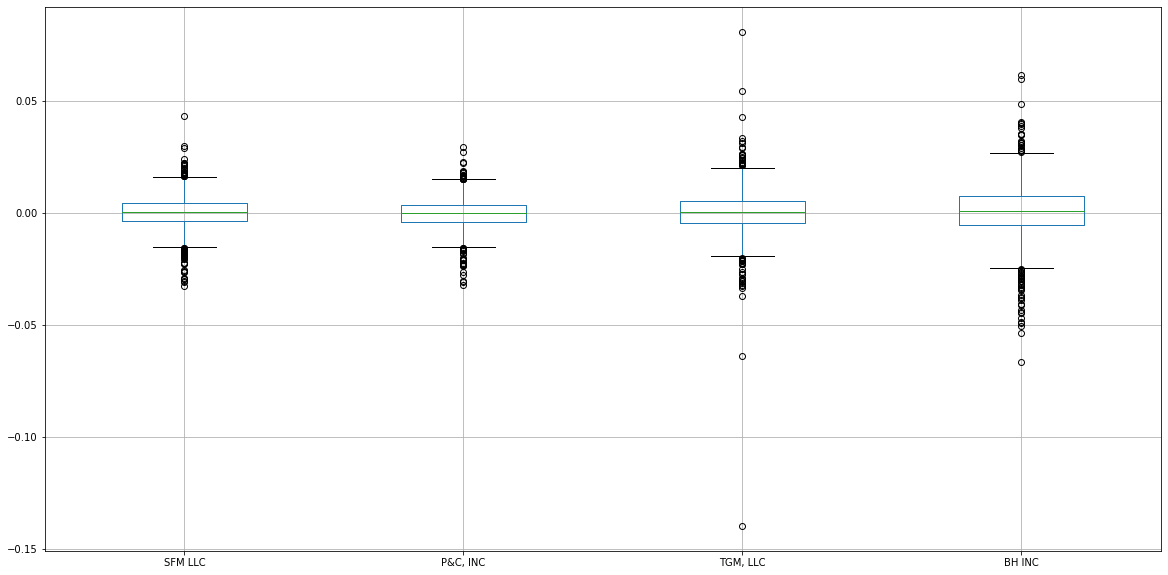

In [308]:
# Box plot to visually show risk
# Box plot to visually show risk
whale_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

<AxesSubplot:>

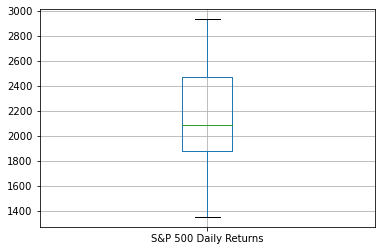

In [309]:
# Calculate the daily standard deviations of all portfolios
sp500_df.boxplot()

### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:>

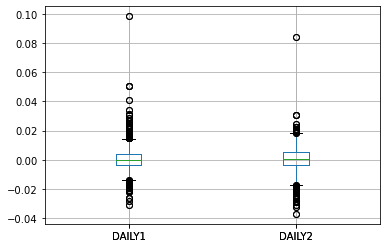

In [310]:
# Calculate  the daily standard deviation of S&P 500
algo_df.boxplot()
# Determine which portfolios are riskier than the S&P 500
algo_df.boxplot(figsize=(20,10))


### Calculate the Annualized Standard Deviation

In [311]:
# Calculate the annualized standard deviation (252 trading days)
# 1. whale
whale_df.std()

SFM LLC     0.007842
P&C, INC    0.006977
TGM, LLC    0.010824
BH INC      0.012831
dtype: float64

In [312]:
# 2. Algo df 
algo_df.std()

DAILY1    0.007988
DAILY2    0.008466
dtype: float64

In [313]:
# 3. S & P 500 
sp500_df.std()

S&P 500 Daily Returns    402.122004
dtype: float64

In [314]:
# combine std
comb_data_frame.std()

SFM LLC                    0.007895
P&C, INC                   0.007023
TGM, LLC                   0.010894
BH INC                     0.012919
DAILY1                     0.007620
DAILY2                     0.008342
S&P 500 Daily Returns    305.852115
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window

2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

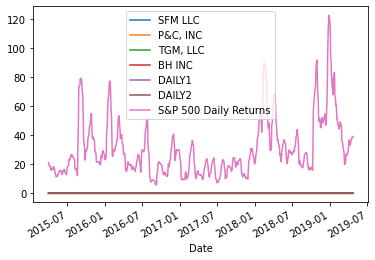

In [315]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation using .plot()
comb_data_frame.rolling(window=21).std().plot()





### Calculate and plot the correlation

<AxesSubplot:>

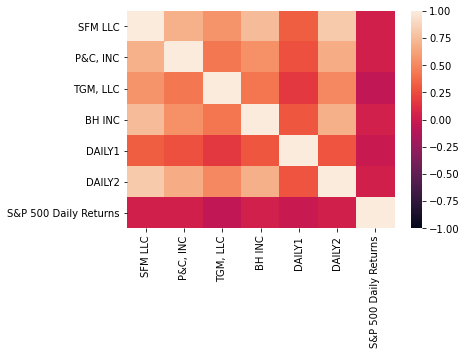

In [316]:
# import library seaborn for heatmap. oh snap it worked!
import seaborn as sns
# Calculate the correlation
price_correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

In [317]:
price_correlation

,SFM LLC,"P&C, INC","TGM, LLC",BH INC,DAILY1,DAILY2,S&P 500 Daily Returns
SFM LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.033918
"P&C, INC",0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.036711
"TGM, LLC",0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.047823
BH INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.041547
DAILY1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.012608
DAILY2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.036267
S&P 500 Daily Returns,0.033918,0.036711,-0.047823,0.041547,-0.012608,0.036267,1.000000


In [318]:
daily_returns = combined_df.pct_change()
daily_returns.head()

,SFM LLC,"P&C, INC","TGM, LLC",BH INC,DAILY1,DAILY2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [320]:
# I cant figure out why this isnt working the file names should be correct....Feedback requested.

# Calculate covariance of a single portfolio
# covariance = daily_returns['SFM LLC'].cov(daily_returns['combined_df'])
# covariance
# Calculate variance of S&P 500
# var = comb_data_frame['combined_df'].var()
# Computing beta
# soro_beta = cov / var
# Plot beta trend
# soro_beta

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

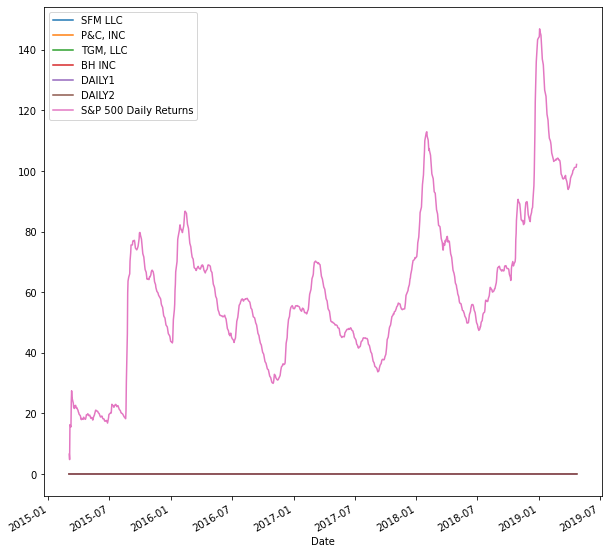

In [321]:
# Use `ewm` to calculate the rolling window. only have one line so no all the info is transfering over
# why??
comb_data_frame.ewm(halflife=21).std().plot(figsize=(10,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [322]:
# Annualized Sharpe Ratios
sharpe_ratios = (comb_data_frame.mean() * 252) / (comb_data_frame.std() * np.sqrt(252))
sharpe_ratios

SFM LLC                    0.356417
P&C, INC                  -0.483570
TGM, LLC                  -0.121060
BH INC                     0.621810
DAILY1                     1.378648
DAILY2                     0.501364
S&P 500 Daily Returns    123.476112
dtype: float64

<AxesSubplot:>

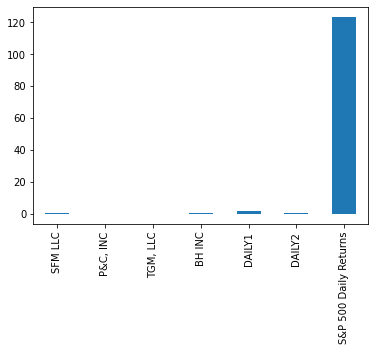

In [323]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [324]:
# Reading data from 1st stock
google_path = Path("Resources/goog_historical.csv")
google_df = pd.read_csv(google_path, index_col ="Trade DATE", parse_dates = True, infer_datetime_format=True)
google_df.rename( columns={"NOCP":"GOOG"},inplace = True )
google_df.drop(columns=['Symbol'], axis=1,inplace = True)
google_df

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [325]:
# Reading data from 2nd stock
apple_path = Path("Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple_path, index_col ="Trade DATE", parse_dates = True, infer_datetime_format=True)
apple_df.rename( columns={"NOCP":"AAPL"},inplace = True )
apple_df.drop(columns=['Symbol'], axis=1,inplace = True)
apple_df

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [326]:
# Reading data from 3rd stock
cost_path = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col ="Trade DATE", parse_dates = True, infer_datetime_format=True)
cost_df.rename( columns={"NOCP":"COST"},inplace = True )
cost_df.drop(columns=['Symbol'], axis=1,inplace = True)
cost_df

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [327]:
# Combine all stocks in a single DataFrame
combine_gac = pd.concat([google_df,apple_df,cost_df], axis='columns', join='inner')
combine_gac.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [328]:
# Reset Date index
combine_gac.sort_index(inplace=True)
combine_gac

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [329]:
# Reorganize portfolio data by having a column per symbol. see above 


In [330]:
# Calculate daily returns
stock_dr = combine_gac.pct_change()
# Drop NAs
stock_dr = stock_dr.dropna()
# Display sample data
stock_dr.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [331]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
Weighted_returns = stock_dr.dot(weights)
# Display sample data
Weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [334]:
# Join your returns DataFrame to the original returns DataFrame
# Join your returns DataFrame to the original returns DataFrame
combined_gac = pd.concat([Weighted_returns, comb_data_frame], axis='columns', join='inner')

combined_gac.rename(columns= {0: "NEW"},inplace = True )
combined_gac.dropna(inplace=True)
combined_gac.sort_index()
combined_gac.head()

,NEW,SFM LLC,"P&C, INC","TGM, LLC",BH INC,DAILY1,DAILY2,S&P 500 Daily Returns
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,2730.13
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,2711.45
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,2722.46
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,2720.13
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,2712.97


In [335]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_gac.dropna()

,NEW,SFM LLC,"P&C, INC","TGM, LLC",BH INC,DAILY1,DAILY2,S&P 500 Daily Returns
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,2730.13
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,2711.45
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,2722.46
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,2720.13
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,2712.97
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,2907.97


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [336]:
# Calculate the annualized `std`
combined_gac.std()
annualized_sd = (combined_gac.var()*252)
annualized_sd = np.sqrt(annualized_sd)
annualized_sd

NEW                         0.211496
SFM LLC                     0.146675
P&C, INC                    0.116732
TGM, LLC                    0.232531
BH INC                      0.247155
DAILY1                      0.133704
DAILY2                      0.139556
S&P 500 Daily Returns    1741.970061
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [338]:
# Calculate rolling standard deviation
rolling_sd_2 = annualized_sd.rolling
# Plot rolling standard deviation
rolling_sd_2

<bound method NDFrame.rolling of NEW                         0.211496
SFM LLC                     0.146675
P&C, INC                    0.116732
TGM, LLC                    0.232531
BH INC                      0.247155
DAILY1                      0.133704
DAILY2                      0.139556
S&P 500 Daily Returns    1741.970061
dtype: float64>

### Calculate and plot the correlation

<AxesSubplot:>

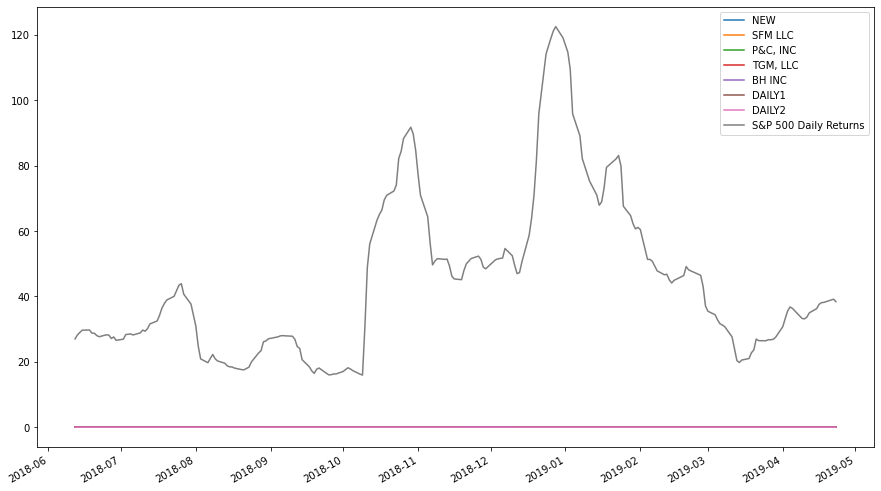

In [342]:
# Calculate and plot the correlation. STILL ONLY GETTING 1 DATA LINE SO DATA IS MISSING..WHY?
combined_gac.rolling(window=21).std().plot(figsize=(15,9))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [344]:
# Calculate and plot Beta
cov_2 = combined_gac["New"].cov(combined_all['SP500_Daily Returns'])
# Calculate variance of S&P 500
var_2 = combined_all['SP500_Daily Returns'].var()
# Computing beta
Custom_beta = cov / var
# Plot beta trend
Custom_beta = cov_2 / var_2
Custom_beta

KeyError: 'New'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [345]:
pwd


'/Users/elizabethcomstock/Desktop/pandas_wa/HW_Instructions/Starter_Code'

In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!